## Plot Reward + Success Rate

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

### GoToLocal

In [2]:
# paths
ec_v5_path = "logs/BabyAI-GoToLocal-v0_V5_L10/log.csv"
ec_v10_path = "logs/BabyAI-GoToLocal-v0_V10_L10/log.csv"
ec_v20_path = "logs/BabyAI-GoToLocal-v0_V20_L10/log.csv"
ec_v50_path = "logs/BabyAI-GoToLocal-v0_V50_L10/log.csv"

In [3]:
# read csv
ec_v5_df = pd.read_csv(ec_v5_path)
ec_v10_df = pd.read_csv(ec_v10_path)
ec_v20_df = pd.read_csv(ec_v20_path)
ec_v50_df = pd.read_csv(ec_v50_path)

In [4]:
# filter
episodes = 100000

ec_v5_df = ec_v5_df[ec_v5_df['episodes'] < episodes]
ec_v10_df = ec_v10_df[ec_v10_df['episodes'] < episodes]
ec_v20_df = ec_v20_df[ec_v20_df['episodes'] < episodes]
ec_v50_df = ec_v50_df[ec_v50_df['episodes'] < episodes]

#### Rolling return

In [5]:
ec_v5_df["rolling_return_mean"] = ec_v5_df["return_mean"].rolling(20).mean()
ec_v10_df["rolling_return_mean"] = ec_v10_df["return_mean"].rolling(20).mean()
ec_v20_df["rolling_return_mean"] = ec_v20_df["return_mean"].rolling(20).mean()
ec_v50_df["rolling_return_mean"] = ec_v50_df["return_mean"].rolling(20).mean()

ec_v5_df["rolling_return_std"] = ec_v5_df["return_mean"].rolling(20).std()
ec_v10_df["rolling_return_std"] = ec_v10_df["return_mean"].rolling(20).std()
ec_v20_df["rolling_return_std"] = ec_v20_df["return_mean"].rolling(20).std()
ec_v50_df["rolling_return_std"] = ec_v50_df["return_mean"].rolling(20).std()

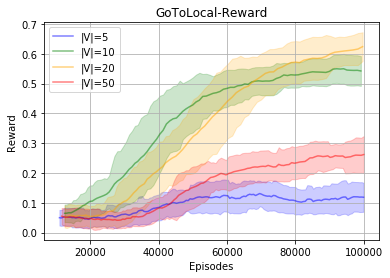

In [6]:
# plot rolling return mean
x = 'episodes'
y = 'rolling_return_mean'
err = 'rolling_return_std'
z = 1.28  # alpha = 0.10

fig, ax = plt.subplots()
ax.grid()

ax.plot(ec_v5_df[x], ec_v5_df[y], label='|V|=5', alpha=0.5, color='blue')
ax.fill_between(ec_v5_df[x], ec_v5_df[y] - z * ec_v5_df[err], ec_v5_df[y] + z * ec_v5_df[err], alpha=0.2, color='blue')

ax.plot(ec_v10_df[x], ec_v10_df[y], label='|V|=10', alpha=0.5, color='green')
ax.fill_between(ec_v10_df[x], ec_v10_df[y] - z * ec_v10_df[err], ec_v10_df[y] + z * ec_v10_df[err], alpha=0.2, color='green')

ax.plot(ec_v20_df[x], ec_v20_df[y], label='|V|=20', alpha=0.5, color='orange')
ax.fill_between(ec_v20_df[x], ec_v20_df[y] - z * ec_v20_df[err], ec_v20_df[y] + z * ec_v20_df[err], alpha=0.2, color='orange')

ax.plot(ec_v50_df[x], ec_v50_df[y], label='|V|=50', alpha=0.5, color='red')
ax.fill_between(ec_v50_df[x], ec_v50_df[y] - z * ec_v50_df[err], ec_v50_df[y] + z * ec_v50_df[err], alpha=0.2, color='red')

ax.set_xlabel('Episodes')
ax.set_ylabel('Reward')
ax.set_title("GoToLocal-Reward")

plt.legend()
plt.savefig("report/GoToLocal_L10-Reward.png")
plt.show()

#### Success rate

In [7]:
ec_v5_df["rolling_sr_mean"] = ec_v5_df["success_rate"].rolling(20).mean()
ec_v10_df["rolling_sr_mean"] = ec_v10_df["success_rate"].rolling(20).mean()
ec_v20_df["rolling_sr_mean"] = ec_v20_df["success_rate"].rolling(20).mean()
ec_v50_df["rolling_sr_mean"] = ec_v50_df["success_rate"].rolling(20).mean()

ec_v5_df["rolling_sr_std"] = ec_v5_df["success_rate"].rolling(20).std()
ec_v10_df["rolling_sr_std"] = ec_v10_df["success_rate"].rolling(20).std()
ec_v20_df["rolling_sr_std"] = ec_v20_df["success_rate"].rolling(20).std()
ec_v50_df["rolling_sr_std"] = ec_v50_df["success_rate"].rolling(20).std()

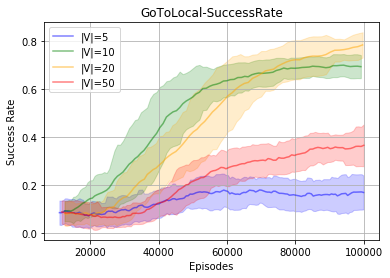

In [8]:
# plot rolling return mean
x = 'episodes'
y = 'rolling_sr_mean'
err = 'rolling_sr_std'
z = 1.28  # alpha = 0.10

fig, ax = plt.subplots()
ax.grid()

ax.plot(ec_v5_df[x], ec_v5_df[y], label='|V|=5', alpha=0.5, color='blue')
ax.fill_between(ec_v5_df[x], ec_v5_df[y] - z * ec_v5_df[err], ec_v5_df[y] + z * ec_v5_df[err], alpha=0.2, color='blue')

ax.plot(ec_v10_df[x], ec_v10_df[y], label='|V|=10', alpha=0.5, color='green')
ax.fill_between(ec_v10_df[x], ec_v10_df[y] - z * ec_v10_df[err], ec_v10_df[y] + z * ec_v10_df[err], alpha=0.2, color='green')

ax.plot(ec_v20_df[x], ec_v20_df[y], label='|V|=20', alpha=0.5, color='orange')
ax.fill_between(ec_v20_df[x], ec_v20_df[y] - z * ec_v20_df[err], ec_v20_df[y] + z * ec_v20_df[err], alpha=0.2, color='orange')

ax.plot(ec_v50_df[x], ec_v50_df[y], label='|V|=50', alpha=0.5, color='red')
ax.fill_between(ec_v50_df[x], ec_v50_df[y] - z * ec_v50_df[err], ec_v50_df[y] + z * ec_v50_df[err], alpha=0.2, color='red')

ax.set_xlabel('Episodes')
ax.set_ylabel('Success Rate')
ax.set_title("GoToLocal-SuccessRate")
plt.legend()
plt.savefig("report/GoToLocal_L10-SuccessRate.png")
plt.show()

### PickupLocal

In [9]:
# paths
ec_v10_path = "logs/BabyAI-PickupLoc-v0_V10_L10/log.csv"
ec_v20_path = "logs/BabyAI-PickupLoc-v0_V20_L10/log.csv"
ec_v50_path = "logs/BabyAI-PickupLoc-v0_V50_L10/log.csv"

In [10]:
# read csv
ec_v10_df = pd.read_csv(ec_v10_path)
ec_v20_df = pd.read_csv(ec_v20_path)
ec_v50_df = pd.read_csv(ec_v50_path)

#### Rolling return

In [11]:
ec_v10_df["rolling_return_mean"] = ec_v10_df["return_mean"].rolling(20).mean()
ec_v20_df["rolling_return_mean"] = ec_v20_df["return_mean"].rolling(20).mean()
ec_v50_df["rolling_return_mean"] = ec_v50_df["return_mean"].rolling(20).mean()

ec_v10_df["rolling_return_std"] = ec_v10_df["return_mean"].rolling(20).std()
ec_v20_df["rolling_return_std"] = ec_v20_df["return_mean"].rolling(20).std()
ec_v50_df["rolling_return_std"] = ec_v50_df["return_mean"].rolling(20).std()

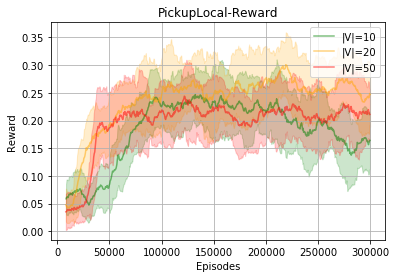

In [12]:
# plot rolling return mean
x = 'episodes'
y = 'rolling_return_mean'
err = 'rolling_return_std'
z = 1.28  # alpha = 0.10

fig, ax = plt.subplots()
ax.grid()

ax.plot(ec_v10_df[x], ec_v10_df[y], label='|V|=10', alpha=0.5, color='green')
ax.fill_between(ec_v10_df[x], ec_v10_df[y] - z * ec_v10_df[err], ec_v10_df[y] + z * ec_v10_df[err], alpha=0.2, color='green')

ax.plot(ec_v20_df[x], ec_v20_df[y], label='|V|=20', alpha=0.5, color='orange')
ax.fill_between(ec_v20_df[x], ec_v20_df[y] - z * ec_v20_df[err], ec_v20_df[y] + z * ec_v20_df[err], alpha=0.2, color='orange')

ax.plot(ec_v50_df[x], ec_v50_df[y], label='|V|=50', alpha=0.5, color='red')
ax.fill_between(ec_v50_df[x], ec_v50_df[y] - z * ec_v50_df[err], ec_v50_df[y] + z * ec_v50_df[err], alpha=0.2, color='red')

ax.set_xlabel('Episodes')
ax.set_ylabel('Reward')
ax.set_title("PickupLocal-Reward")
plt.legend()
plt.savefig("report/PickupLocal_10-Reward.png")
plt.show()

#### Success rate

In [13]:
ec_v10_df["rolling_sr_mean"] = ec_v10_df["success_rate"].rolling(20).mean()
ec_v20_df["rolling_sr_mean"] = ec_v20_df["success_rate"].rolling(20).mean()
ec_v50_df["rolling_sr_mean"] = ec_v50_df["success_rate"].rolling(20).mean()

ec_v10_df["rolling_sr_std"] = ec_v10_df["success_rate"].rolling(20).std()
ec_v20_df["rolling_sr_std"] = ec_v20_df["success_rate"].rolling(20).std()
ec_v50_df["rolling_sr_std"] = ec_v50_df["success_rate"].rolling(20).std()

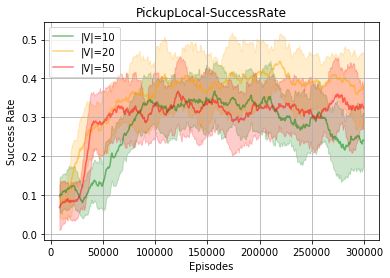

In [14]:
# plot rolling return mean
x = 'episodes'
y = 'rolling_sr_mean'
err = 'rolling_sr_std'
z = 1.28  # alpha = 0.10

fig, ax = plt.subplots()
ax.grid()

ax.plot(ec_v10_df[x], ec_v10_df[y], label='|V|=10', alpha=0.5, color='green')
ax.fill_between(ec_v10_df[x], ec_v10_df[y] - z * ec_v10_df[err], ec_v10_df[y] + z * ec_v10_df[err], alpha=0.2, color='green')

ax.plot(ec_v20_df[x], ec_v20_df[y], label='|V|=20', alpha=0.5, color='orange')
ax.fill_between(ec_v20_df[x], ec_v20_df[y] - z * ec_v20_df[err], ec_v20_df[y] + z * ec_v20_df[err], alpha=0.2, color='orange')

ax.plot(ec_v50_df[x], ec_v50_df[y], label='|V|=50', alpha=0.5, color='red')
ax.fill_between(ec_v50_df[x], ec_v50_df[y] - z * ec_v50_df[err], ec_v50_df[y] + z * ec_v50_df[err], alpha=0.2, color='red')

ax.set_xlabel('Episodes')
ax.set_ylabel('Success Rate')
ax.set_title("PickupLocal-SuccessRate")
plt.legend()
plt.savefig("report/PickupLocal_L10-SuccessRate.png")
plt.show()

#### Compare with baseline model

In [15]:
# paths
ec_v10_bs_path = "logs/BabyAI-PickupLoc-v0_V10_L10_baseline/log.csv"
ec_v20_bs_path = "logs/BabyAI-PickupLoc-v0_V20_L10_baseline/log.csv"
ec_v50_bs_path = "logs/BabyAI-PickupLoc-v0_V50_L10_baseline/log.csv"

In [16]:
# read csv
ec_v10_bs_df = pd.read_csv(ec_v10_bs_path)
ec_v20_bs_df = pd.read_csv(ec_v20_bs_path)
ec_v50_bs_df = pd.read_csv(ec_v50_bs_path)

FileNotFoundError: [Errno 2] No such file or directory: 'logs/BabyAI-PickupLoc-v0_V10_L10_baseline/log.csv'

In [17]:
# filter
episodes = 100000

ec_v10_df = ec_v10_df[ec_v10_df['episodes'] < episodes]
ec_v20_df = ec_v20_df[ec_v20_df['episodes'] < episodes]
ec_v50_df = ec_v50_df[ec_v50_df['episodes'] < episodes]

ec_v10_bs_df = ec_v10_bs_df[ec_v10_bs_df['episodes'] < episodes]
ec_v20_bs_df = ec_v20_bs_df[ec_v20_bs_df['episodes'] < episodes]
ec_v50_bs_df = ec_v50_bs_df[ec_v50_bs_df['episodes'] < episodes]

#### Rolling return

In [18]:
ec_v10_bs_df["rolling_return_mean"] = ec_v10_bs_df["return_mean"].rolling(20).mean()
ec_v20_bs_df["rolling_return_mean"] = ec_v20_bs_df["return_mean"].rolling(20).mean()
ec_v50_bs_df["rolling_return_mean"] = ec_v50_bs_df["return_mean"].rolling(20).mean()

ec_v10_bs_df["rolling_return_std"] = ec_v10_bs_df["return_mean"].rolling(20).std()
ec_v20_bs_df["rolling_return_std"] = ec_v20_bs_df["return_mean"].rolling(20).std()
ec_v50_bs_df["rolling_return_std"] = ec_v50_bs_df["return_mean"].rolling(20).std()

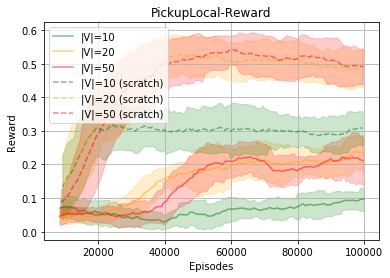

In [19]:
# plot rolling return mean
x = 'episodes'
y = 'rolling_return_mean'
err = 'rolling_return_std'
z = 1.28  # alpha = 0.10

fig, ax = plt.subplots()
ax.grid()

ax.plot(ec_v10_df[x], ec_v10_df[y], label='|V|=10', alpha=0.5, color='green')
ax.fill_between(ec_v10_df[x], ec_v10_df[y] - z * ec_v10_df[err], ec_v10_df[y] + z * ec_v10_df[err], alpha=0.2, color='green')

ax.plot(ec_v20_df[x], ec_v20_df[y], label='|V|=20', alpha=0.5, color='orange')
ax.fill_between(ec_v20_df[x], ec_v20_df[y] - z * ec_v20_df[err], ec_v20_df[y] + z * ec_v20_df[err], alpha=0.2, color='orange')

ax.plot(ec_v50_df[x], ec_v50_df[y], label='|V|=50', alpha=0.5, color='red')
ax.fill_between(ec_v50_df[x], ec_v50_df[y] - z * ec_v50_df[err], ec_v50_df[y] + z * ec_v50_df[err], alpha=0.2, color='red')

ax.plot(ec_v10_bs_df[x], ec_v10_bs_df[y], '--', label='|V|=10 (scratch)', alpha=0.5, color='green')
ax.fill_between(ec_v10_bs_df[x], ec_v10_bs_df[y] - z * ec_v10_bs_df[err], ec_v10_bs_df[y] + z * ec_v10_bs_df[err], alpha=0.2, color='green')

ax.plot(ec_v20_bs_df[x], ec_v20_bs_df[y], '--', label='|V|=20 (scratch)', alpha=0.5, color='orange')
ax.fill_between(ec_v20_bs_df[x], ec_v20_bs_df[y] - z * ec_v20_bs_df[err], ec_v20_bs_df[y] + z * ec_v20_bs_df[err], alpha=0.2, color='orange')

ax.plot(ec_v50_bs_df[x], ec_v50_bs_df[y], '--', label='|V|=50 (scratch)', alpha=0.5, color='red')
ax.fill_between(ec_v50_bs_df[x], ec_v50_bs_df[y] - z * ec_v50_bs_df[err], ec_v50_bs_df[y] + z * ec_v50_bs_df[err], alpha=0.2, color='red')

ax.set_xlabel('Episodes')
ax.set_ylabel('Reward')
ax.set_title("PickupLocal-Reward")
plt.legend()
plt.savefig("report/PickupLocal_L10-Reward-wBaseline.png")
plt.show()

#### Success rate

In [20]:
ec_v10_bs_df["rolling_sr_mean"] = ec_v10_bs_df["success_rate"].rolling(20).mean()
ec_v20_bs_df["rolling_sr_mean"] = ec_v20_bs_df["success_rate"].rolling(20).mean()
ec_v50_bs_df["rolling_sr_mean"] = ec_v50_bs_df["success_rate"].rolling(20).mean()

ec_v10_bs_df["rolling_sr_std"] = ec_v10_bs_df["success_rate"].rolling(20).std()
ec_v20_bs_df["rolling_sr_std"] = ec_v20_bs_df["success_rate"].rolling(20).std()
ec_v50_bs_df["rolling_sr_std"] = ec_v50_bs_df["success_rate"].rolling(20).std()

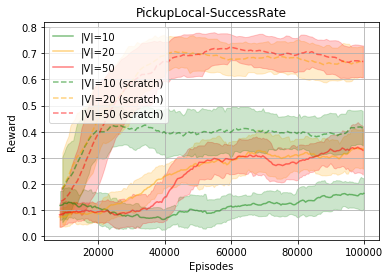

In [21]:
# plot rolling return mean
x = 'episodes'
y = 'rolling_sr_mean'
err = 'rolling_sr_std'
z = 1.28  # alpha = 0.10

fig, ax = plt.subplots()
ax.grid()

ax.plot(ec_v10_df[x], ec_v10_df[y], label='|V|=10', alpha=0.5, color='green')
ax.fill_between(ec_v10_df[x], ec_v10_df[y] - z * ec_v10_df[err], ec_v10_df[y] + z * ec_v10_df[err], alpha=0.2, color='green')

ax.plot(ec_v20_df[x], ec_v20_df[y], label='|V|=20', alpha=0.5, color='orange')
ax.fill_between(ec_v20_df[x], ec_v20_df[y] - z * ec_v20_df[err], ec_v20_df[y] + z * ec_v20_df[err], alpha=0.2, color='orange')

ax.plot(ec_v50_df[x], ec_v50_df[y], label='|V|=50', alpha=0.5, color='red')
ax.fill_between(ec_v50_df[x], ec_v50_df[y] - z * ec_v50_df[err], ec_v50_df[y] + z * ec_v50_df[err], alpha=0.2, color='red')

ax.plot(ec_v10_bs_df[x], ec_v10_bs_df[y], '--', label='|V|=10 (scratch)', alpha=0.5, color='green')
ax.fill_between(ec_v10_bs_df[x], ec_v10_bs_df[y] - z * ec_v10_bs_df[err], ec_v10_bs_df[y] + z * ec_v10_bs_df[err], alpha=0.2, color='green')

ax.plot(ec_v20_bs_df[x], ec_v20_bs_df[y], '--', label='|V|=20 (scratch)', alpha=0.5, color='orange')
ax.fill_between(ec_v20_bs_df[x], ec_v20_bs_df[y] - z * ec_v20_bs_df[err], ec_v20_bs_df[y] + z * ec_v20_bs_df[err], alpha=0.2, color='orange')

ax.plot(ec_v50_bs_df[x], ec_v50_bs_df[y], '--', label='|V|=50 (scratch)', alpha=0.5, color='red')
ax.fill_between(ec_v50_bs_df[x], ec_v50_bs_df[y] - z * ec_v50_bs_df[err], ec_v50_bs_df[y] + z * ec_v50_bs_df[err], alpha=0.2, color='red')

ax.set_xlabel('Episodes')
ax.set_ylabel('Reward')
ax.set_title("PickupLocal-SuccessRate")
plt.legend()
plt.savefig("report/PickupLocal_L10-SuccessRate-wBaseline.png")
plt.show()

## For report (09/03)

##### 1. Compare normal/zero-masked input in non-strict mode

In [ ]:
rl_csv_path = "logs/PartialObservation/BabyAI-GoToLocal-v0_ppo_expert_filmcnn_gru_mem_seed1_20-07-24-16-09-54/log.csv"
rl_strict_path = "logs/PartialObservation/BabyAI-GoToLocal-v0_strict_ppo_expert_filmcnn_gru_mem_seed1_20-08-28-03-19-49/log.csv"
dummy_csv_path = "logs/Failures/coding_mistake/BabyAI-GoToLocal-v0_ppo_reinforce_expert_filmcnn_gru_mem_seed1_V10_L5_20-08-19-00-25-55/log.csv"  # EC non-strict zero-message
dummy_strict_csv_path = "logs/Failures/BabyAI-GoToLocal-v0_ppo_expert_filmcnn_gru_mem_seed1_20-08-28-15-14-00/log.csv"  # imageinstr strict failed

In [ ]:
rl_df = pd.read_csv(rl_csv_path)
rl_strict_df = pd.read_csv(rl_strict_path)
dummy_df = pd.read_csv(dummy_csv_path)
dummy_strict_df = pd.read_csv(dummy_strict_csv_path)

In [ ]:
rl_df["rolling_return_mean"] = rl_df["return_mean"].rolling(20).mean()
rl_strict_df["rolling_return_mean"] = rl_strict_df["return_mean"].rolling(20).mean()
dummy_df["rolling_return_mean"] = dummy_df["return_mean"].rolling(20).mean()
dummy_strict_df["rolling_return_mean"] = dummy_strict_df["return_mean"].rolling(20).mean()

rl_df["rolling_return_std"] = rl_df["return_mean"].rolling(20).std()
rl_strict_df["rolling_return_std"] = rl_strict_df["return_mean"].rolling(20).std()
dummy_df["rolling_return_std"] = dummy_df["return_mean"].rolling(20).std()
dummy_strict_df["rolling_return_std"] = dummy_strict_df["return_mean"].rolling(20).std()

In [ ]:
x = 'episodes'
y = 'rolling_return_mean'
err = 'rolling_return_std'

fig, ax = plt.subplots()

ax.plot(rl_df[x], rl_df[y], label='normal input', alpha=0.5, color='blue')
ax.fill_between(rl_df[x], rl_df[y] - 1.96 * rl_df[err], rl_df[y] + 1.96 * rl_df[err], alpha=0.2, color='blue')

ax.plot(dummy_df[x], dummy_df[y], label='zero-masked input', alpha=0.5, color='red')
ax.fill_between(dummy_df[x], dummy_df[y] - 1.96 * dummy_df[err], dummy_df[y] + 1.96 * dummy_df[err], alpha=0.2, color='red')

ax.set_xlim(right=4e5)
ax.set_xlabel('episodes')
ax.set_ylabel('reward')
ax.set_title("GoToLocal (non-strict mode)")
ax.legend()

plt.savefig('report/GoToLocal(non-strict mode).png')
plt.show()

In [ ]:
x = 'episodes'
y = 'rolling_return_mean'
err = 'rolling_return_std'

fig, ax = plt.subplots()

ax.plot(rl_strict_df[x], rl_strict_df[y], label='normal input', alpha=0.5, color='blue')
ax.fill_between(rl_strict_df[x], rl_strict_df[y] - 1.96 * rl_strict_df[err], rl_strict_df[y] + 1.96 * rl_strict_df[err], alpha=0.2, color='blue')

ax.plot(dummy_strict_df[x], dummy_strict_df[y], label='zero-masked input', alpha=0.5, color='red')
ax.fill_between(dummy_strict_df[x], dummy_strict_df[y] - 1.96 * dummy_strict_df[err], dummy_strict_df[y] + 1.96 * dummy_strict_df[err], alpha=0.2, color='red')

ax.set_xlim(right=4e5)
ax.set_xlabel('episodes')
ax.set_ylabel('reward')
ax.set_title("GoToLocal(strict mode)")
plt.legend()

plt.savefig('report/GoToLocal(strict mode).png')
plt.show()

In [ ]:
x = 'episodes'
y = 'rolling_return_mean'
err = 'rolling_return_std'

fig, ax = plt.subplots()

ax.plot(rl_df[x], rl_df[y], label='non-strict', alpha=0.5, color='blue')
ax.fill_between(rl_df[x], rl_df[y] - 1.96 * rl_df[err], rl_df[y] + 1.96 * rl_df[err], alpha=0.2, color='blue')

ax.plot(rl_strict_df[x], rl_strict_df[y], label='strict', alpha=0.5, color='red')
ax.fill_between(rl_strict_df[x], rl_strict_df[y] - 1.96 * rl_strict_df[err], rl_strict_df[y] + 1.96 * rl_strict_df[err], alpha=0.2, color='red')

ax.set_xlim(right=5e5)
ax.set_xlabel('episodes')
ax.set_ylabel('reward')
ax.set_title("Strict_Non-Strict_comparison")
plt.legend()

plt.savefig('report/StrictNonStrictComparison.png')
plt.show()

##### 2. Image-Instruction

In [ ]:
seq_path = "logs/PartialObservation/BabyAI-GoToLocal-v0_strict_ppo_expert_filmcnn_gru_mem_seed1_20-08-28-03-19-49/log.csv"  # sequential input (strict mode)
imginstr_path = "logs/BabyAI-GoToLocal-v0_ppo_expert_filmcnn_gru_mem_seed1_20-08-30-00-10-15/log.csv"  # single image instruction

In [ ]:
seq_df = pd.read_csv(seq_path)
imginstr_df = pd.read_csv(imginstr_path)

In [ ]:
seq_df["rolling_return_mean"] = seq_df["return_mean"].rolling(20).mean()
imginstr_df["rolling_return_mean"] = imginstr_df["return_mean"].rolling(20).mean()

seq_df["rolling_return_std"] = seq_df["return_mean"].rolling(20).std()
imginstr_df["rolling_return_std"] = imginstr_df["return_mean"].rolling(20).std()

In [ ]:
x = 'episodes'
y = 'rolling_return_mean'
err = 'rolling_return_std'

fig, ax = plt.subplots()

ax.plot(seq_df[x], seq_df[y], label='sequential tokens', alpha=0.5, color='blue')
ax.fill_between(seq_df[x], seq_df[y] - 1.96 * seq_df[err], seq_df[y] + 1.96 * seq_df[err], alpha=0.2, color='blue')

ax.plot(imginstr_df[x], imginstr_df[y], label='images', alpha=0.5, color='red')
ax.fill_between(imginstr_df[x], imginstr_df[y] - 1.96 * imginstr_df[err], imginstr_df[y] + 1.96 * imginstr_df[err], alpha=0.2, color='red')

# ax.set_xlim(right=4e5)
ax.set_xlabel('episodes')
ax.set_ylabel('reward')
ax.set_title("GoToLocal (strict mode)")
ax.legend()

plt.savefig('report/InputRepresentation.png')
plt.show()